In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from single_population_discrete import SinglePopulationDiscrete
from aux import subplots1D

%load_ext autoreload

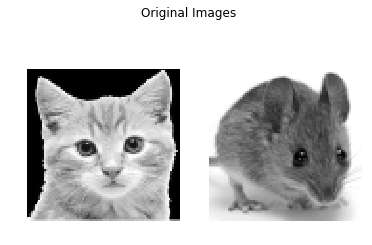

In [2]:
# Load raw images
# img1 = (mpimg.imread('../img/cat3.png')[:,:,0] > 0.5).astype(int)
# img2 = (mpimg.imread('../img/mouse3.png')[:,:,0] > 0.5).astype(int)
img1 = mpimg.imread('../img/cat4.png')
img2 = mpimg.imread('../img/mouse4.png')

# Plot raw images
fig, axis = plt.subplots(ncols=2)
axis[0].imshow(img1, cmap='gray')
axis[1].imshow(img2, cmap='gray')
axis[0].set_axis_off()
axis[1].set_axis_off()
plt.suptitle('Original Images');

In [3]:
############################################
# Initialize a network with sparse connectivity
############################################
N_EXC = img1.shape[0] * img1.shape[1]
N_INH = int(N_EXC / 5)
print('Number of neurons is', [N_EXC, N_INH])

param = {
    'N_EXC' : N_EXC,
    'N_INH' : N_INH,

    'T_RANGE_EXC' : [0.0, 1.0],
    'T_RANGE_INH' : [0.0, 1.0],
    'W_MAG_EXC'   : 1.0,
    'W_MAG_INH'  : -1.0, # Note that inhibitory weights will be 5 times stronger because of normalization below
    
    'P_CONN'      : {'EXC_EXC' : 0.1, 'EXC_INH' : 0.1, 'INH_EXC' : 0.1, 'INH_INH' : 0.1},
    'SP_RATE'     : {'EXC_EXC' : 0.01, 'EXC_INH' : 0.0, 'INH_EXC' : 0.0, 'INH_INH' : 0.0},

    'WITH_SYNAPSES' : True,
    'WITH_INIT_NORM_INP' : True
}

spd1 = SinglePopulationDiscrete(param)

Number of neurons is [6400, 1280]


Doing step 0 {'State': 0, 'IP': 0, 'STDP': 0, 'STAT': 0, 'UPDATE': 0}
Doing step 20 {'State': 0.17, 'IP': 0, 'STDP': 1.57, 'STAT': 0.9, 'UPDATE': 0.0}
Doing step 40 {'State': 0.32, 'IP': 0, 'STDP': 2.92, 'STAT': 1.67, 'UPDATE': 0.0}
Doing step 60 {'State': 0.46, 'IP': 0, 'STDP': 4.3, 'STAT': 2.44, 'UPDATE': 0.01}
Doing step 80 {'State': 0.62, 'IP': 0, 'STDP': 5.86, 'STAT': 3.3, 'UPDATE': 0.01}


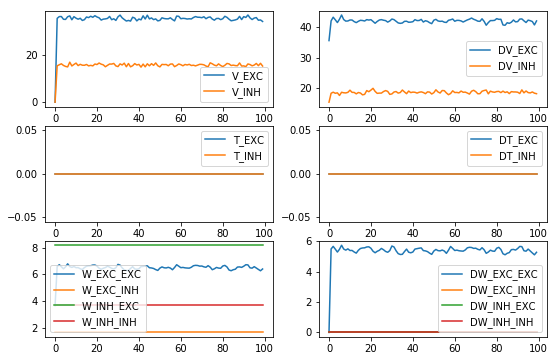

In [4]:
############################################
# Run the network with no input, only noise
############################################
VI_MAT_NOISE = np.zeros((100, N_EXC))

param_sim_noise = {
    'WITH_IP'       : False,
    'WITH_SP'       : True,
    'SOMA_NOISE_EXC' : [0.0, 0.5],
    'SOMA_NOISE_INH' : [0.0, 0.5]
}

spd1.run(VI_MAT_NOISE, param_sim_noise)

# Plot network indicators
plotStruct = np.array([
    [['V_EXC', 'V_INH'], ['DV_EXC', 'DV_INH']],
    [['T_EXC', 'T_INH'], ['DT_EXC', 'DT_INH']],
    [
        ['W_EXC_EXC', 'W_EXC_INH', 'W_INH_EXC', 'W_INH_INH'],
        ['DW_EXC_EXC', 'DW_EXC_INH', 'DW_INH_EXC', 'DW_INH_INH']
    ]
])

subplots1D(spd1.statsDict, plotStruct)

Doing step 0 {'State': 0, 'IP': 0, 'STDP': 0, 'STAT': 0, 'UPDATE': 0}
Doing step 20 {'State': 0.15, 'IP': 0, 'STDP': 1.48, 'STAT': 0.8, 'UPDATE': 0.0}
Doing step 40 {'State': 0.31, 'IP': 0, 'STDP': 2.99, 'STAT': 1.61, 'UPDATE': 0.01}
Doing step 60 {'State': 0.46, 'IP': 0, 'STDP': 4.48, 'STAT': 2.38, 'UPDATE': 0.01}
Doing step 80 {'State': 0.6, 'IP': 0, 'STDP': 5.84, 'STAT': 3.08, 'UPDATE': 0.02}
Doing step 100 {'State': 0.76, 'IP': 0, 'STDP': 7.33, 'STAT': 3.85, 'UPDATE': 0.02}
Doing step 120 {'State': 0.92, 'IP': 0, 'STDP': 8.9, 'STAT': 4.67, 'UPDATE': 0.03}
Doing step 140 {'State': 1.08, 'IP': 0, 'STDP': 10.49, 'STAT': 5.52, 'UPDATE': 0.04}
Doing step 160 {'State': 1.23, 'IP': 0, 'STDP': 11.94, 'STAT': 6.26, 'UPDATE': 0.04}
Doing step 180 {'State': 1.37, 'IP': 0, 'STDP': 13.3, 'STAT': 6.96, 'UPDATE': 0.04}
Doing step 200 {'State': 1.51, 'IP': 0, 'STDP': 14.67, 'STAT': 7.66, 'UPDATE': 0.05}
Doing step 220 {'State': 1.66, 'IP': 0, 'STDP': 16.11, 'STAT': 8.41, 'UPDATE': 0.05}
Doing step

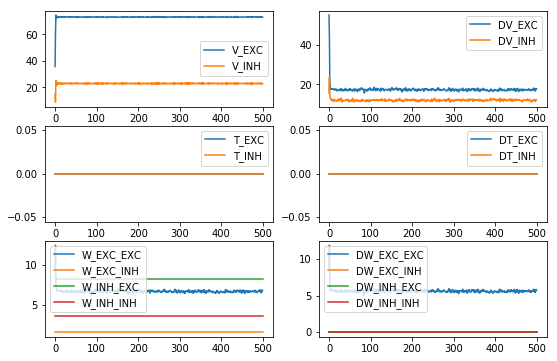

In [5]:
############################################
# Run the network by feeding in the cat 100 times
############################################
VI_MAT_CAT = np.tile(np.ndarray.flatten(img1), (500, 1))

param_sim_img = {
    'WITH_IP'       : False,
    'WITH_SP'       : True,
    'SOMA_NOISE_EXC' : [0.0, 0.1],
    'SOMA_NOISE_INH' : [0.0, 0.1]
}

spd1.run(VI_MAT_CAT, param_sim_img)

subplots1D(spd1.statsDict, plotStruct)

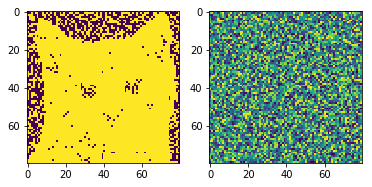

In [6]:
fig, ax = plt.subplots(ncols=2)
ax[0].imshow(spd1.v['V_EXC'].reshape(img1.shape))
ax[1].imshow(spd1.v['T_EXC'].reshape(img1.shape))
plt.show()

Doing step 0 {'State': 0, 'IP': 0, 'STDP': 0, 'STAT': 0, 'UPDATE': 0}
Doing step 20 {'State': 0.15, 'IP': 0, 'STDP': 0, 'STAT': 0.0, 'UPDATE': 0.0}
Doing step 40 {'State': 0.29, 'IP': 0, 'STDP': 0, 'STAT': 0.0, 'UPDATE': 0.0}
Doing step 60 {'State': 0.43, 'IP': 0, 'STDP': 0, 'STAT': 0.0, 'UPDATE': 0.0}
Doing step 80 {'State': 0.58, 'IP': 0, 'STDP': 0, 'STAT': 0.01, 'UPDATE': 0.0}
Doing step 100 {'State': 0.71, 'IP': 0, 'STDP': 0, 'STAT': 0.01, 'UPDATE': 0.0}
Doing step 120 {'State': 0.86, 'IP': 0, 'STDP': 0, 'STAT': 0.01, 'UPDATE': 0.0}
Doing step 140 {'State': 1.0, 'IP': 0, 'STDP': 0, 'STAT': 0.01, 'UPDATE': 0.0}
Doing step 160 {'State': 1.15, 'IP': 0, 'STDP': 0, 'STAT': 0.01, 'UPDATE': 0.0}
Doing step 180 {'State': 1.29, 'IP': 0, 'STDP': 0, 'STAT': 0.01, 'UPDATE': 0.0}
Doing step 200 {'State': 1.43, 'IP': 0, 'STDP': 0, 'STAT': 0.01, 'UPDATE': 0.0}
Doing step 220 {'State': 1.58, 'IP': 0, 'STDP': 0, 'STAT': 0.01, 'UPDATE': 0.0}
Doing step 240 {'State': 1.72, 'IP': 0, 'STDP': 0, 'STAT':

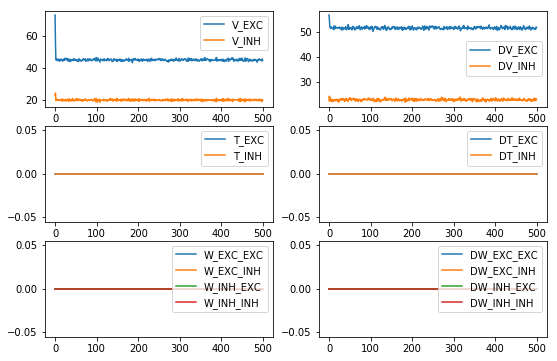

In [7]:
############################################
# Run the network by feeding in the cat 100 times
############################################
VI_MAT_NOISE = np.zeros((500, N_EXC))

param_sim_noise = {
    'WITH_IP'       : False,
    'WITH_SP'       : False,
    'SOMA_NOISE_EXC' : [0.0, 1.0],
    'SOMA_NOISE_INH' : [0.0, 1.0]
}

spd1.run(VI_MAT_NOISE, param_sim_noise)

subplots1D(spd1.statsDict, plotStruct)

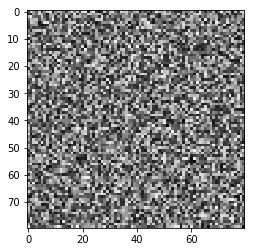

In [8]:
avgRate = np.sum(np.array(spd1.V_Lst), axis=0)

fig, ax = plt.subplots()
ax.imshow(avgRate.reshape(img1.shape), cmap='gray')
plt.show()